In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Train data

train_data=pd.read_csv('Train.csv')


In [3]:
train_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
# Test Data

test_data=pd.read_csv('Test.csv')
test_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


### EDA 

In [5]:
# Lets check the information about data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


There are some null values in location,size, bath, balcony.

In [6]:
# Lets make 5 points summary for the numeric columns

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [7]:
# Lets make 5 points summary for the object columns

train_data.describe(include=object).T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


In [8]:
# Check the datatypes

train_data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [9]:
# Check for duplicates

train_data[train_data.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


 There are showing 529 duplicates rows but after reviewing the each and every columns the values are differents so we cannot treat these rows as duplicate

### Visualization

In [10]:
# Lets define the numerical columns and categorical columns

train_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [11]:
num_cols=['bath', 'balcony', 'price','total_sqft']
cat_cols=['area_type', 'availability', 'location', 'size', 'society']

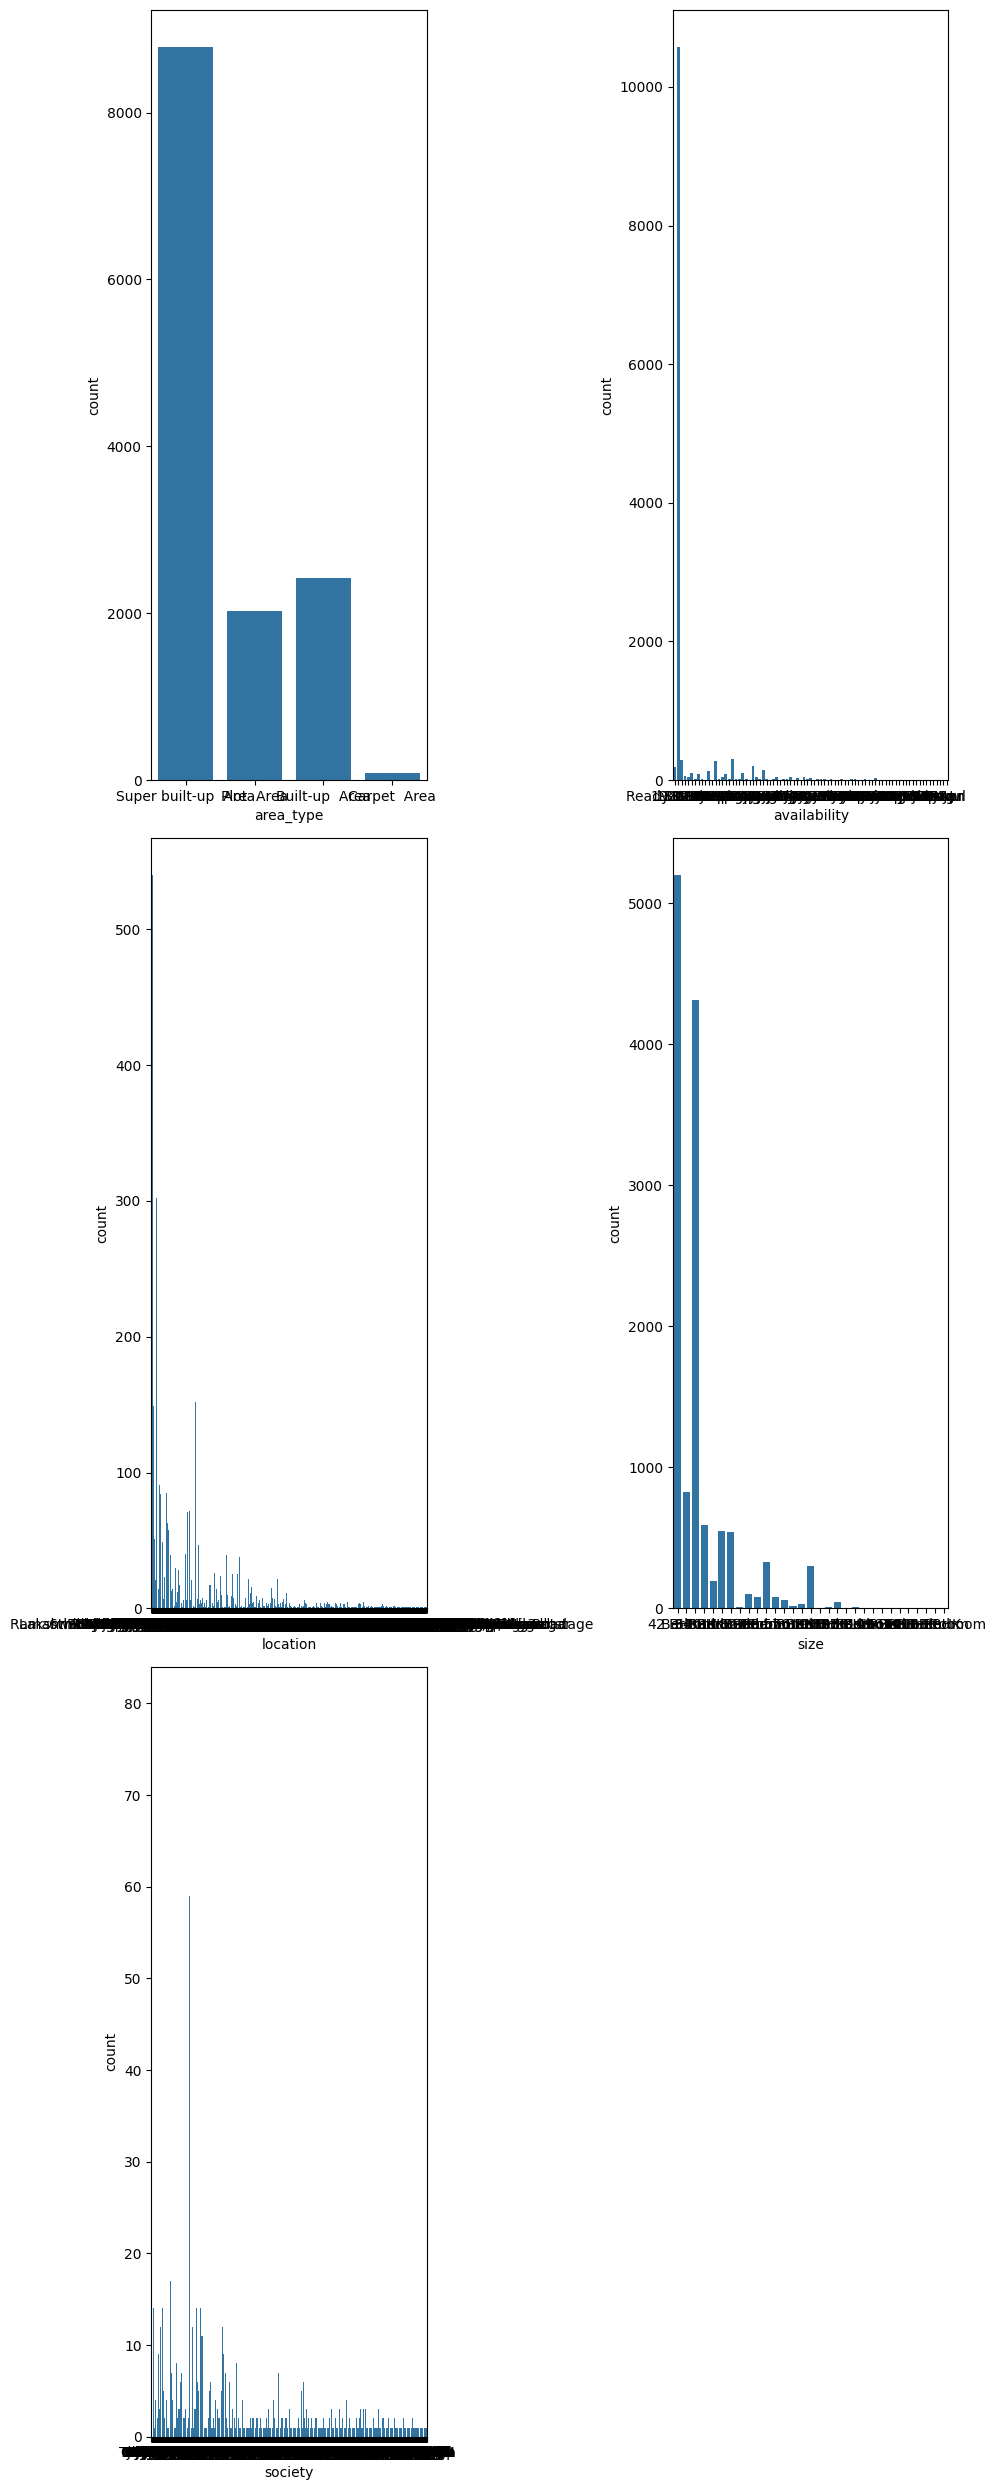

In [12]:
t=1
plt.figure(figsize=(10,25))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot(x=train_data[i])
    t+=1

plt.tight_layout()
plt.show()

In [13]:
# Explore the columns

train_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

<Axes: xlabel='area_type'>

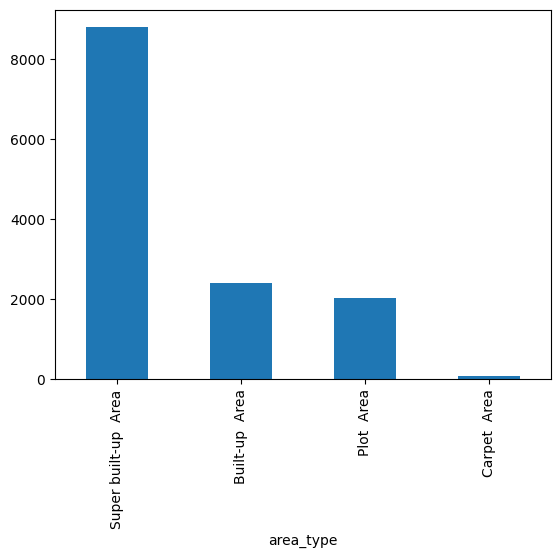

In [14]:
# Area Type

train_data['area_type'].value_counts().plot(kind='bar')

In [15]:
train_data['area_type'].value_counts(normalize=True)

area_type
Super built-up  Area    0.659910
Built-up  Area          0.181532
Plot  Area              0.152027
Carpet  Area            0.006532
Name: proportion, dtype: float64

Top Area type is Superbuilt-up Area and it covers 65% of data
Carpet Area is having less proportion in data



In [16]:
# Availability

train_data['availability'].unique()


array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [17]:
# We can remap this column by putting 1 for ready to move and 0 for others

train_data['availability']=[1 if x=='Ready To Move' else 0 for x in train_data['availability']]

<Axes: xlabel='availability'>

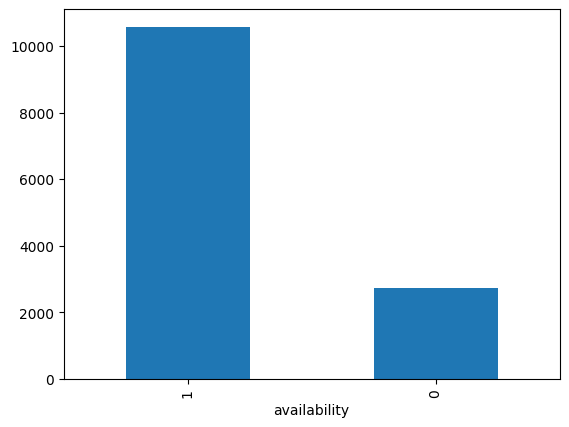

In [18]:
train_data['availability'].value_counts().plot(kind='bar')

In [19]:
# Location

train_data['location'].value_counts()


location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [20]:
# size

train_data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [21]:
train_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
def extract_bhk(x):
    try:
        bhk = int(x.split(' ')[0])
        return bhk
    except:
        return np.nan

In [23]:
train_data['size']=train_data['size'].apply(extract_bhk)

In [24]:
train_data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,NaN,1200,2.0,1.0,51.00


In [25]:
train_data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x.strip())
    except:
        return None

In [27]:
train_data['total_sqft'] = pd.to_numeric(train_data['total_sqft'], errors='coerce')

In [28]:
train_data.dtypes

area_type        object
availability      int64
location         object
size            float64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

Numeric Columns

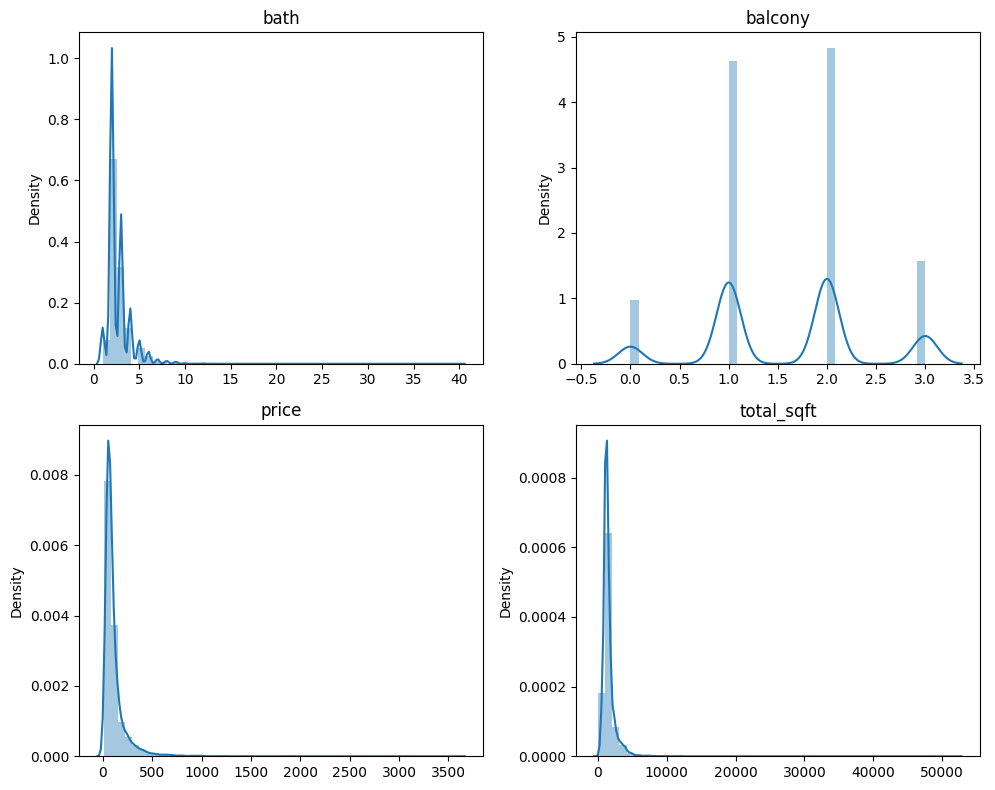

In [29]:
t=1
plt.figure(figsize=(10,8))

for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(x=train_data[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

Bath,price has right skewed data. Most property has less bathroom and less price

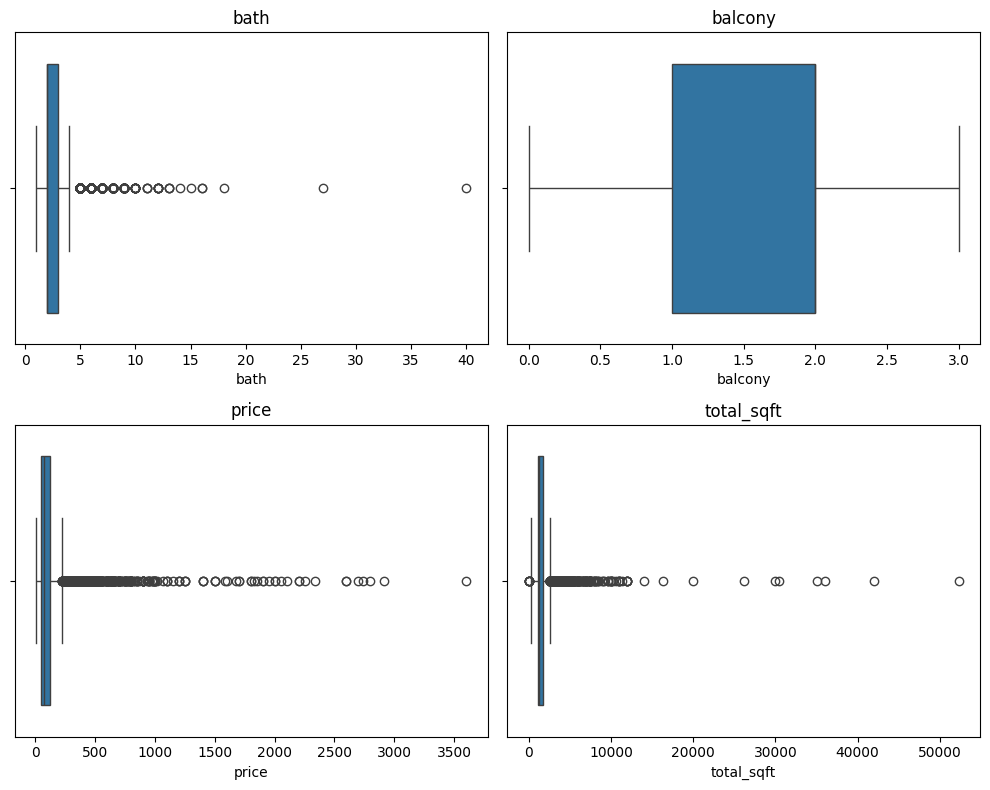

In [30]:
# Check for outliers

t=1
plt.figure(figsize=(10,8))

for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=train_data[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

Balcony has no outliers while bath, price, total sqft has extreme outliers

### Bivariate Analysis 

<Axes: >

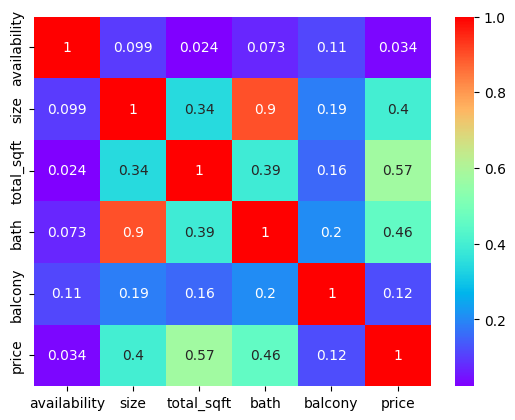

In [31]:
# Lets check correlation

sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='rainbow')

There is weak correlation in balcony and availabilty.
Size and Total Sqft has high correlation with price

In [32]:
cat_cols

['area_type', 'availability', 'location', 'size', 'society']

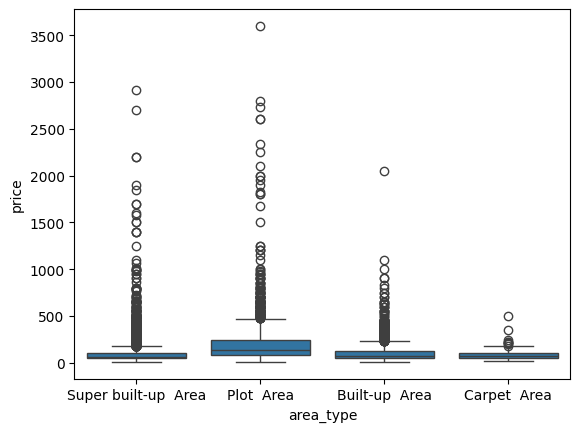

In [33]:
# Lets explore effect of areatype in price

sns.boxplot(x=train_data['area_type'],y=train_data['price'])
plt.show()

In [34]:
from scipy.stats import shapiro,jarque_bera,kruskal
from scipy import stats

In [35]:
# H0: Data is normal
# Ha: Data is not normal
jarque_bera(train_data['price'])

SignificanceResult(statistic=6632915.949139312, pvalue=0.0)

In [36]:
# The data is not normal we should go with non parametric kruaskal test

# H0: Airline has no effect on Price
# Ha: Atleast one airline has different price

sam=[]
for i in ['Super built-up  Area', 'Plot  Area','Built-up  Area','Carpet  Area']:
    s=train_data[train_data['area_type']==i]['price']
    sam.append(s)

In [37]:
kruskal(sam[0],sam[1],sam[2],sam[3])

KruskalResult(statistic=1491.5655775623948, pvalue=0.0)

In [38]:
train_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

<Axes: xlabel='availability', ylabel='price'>

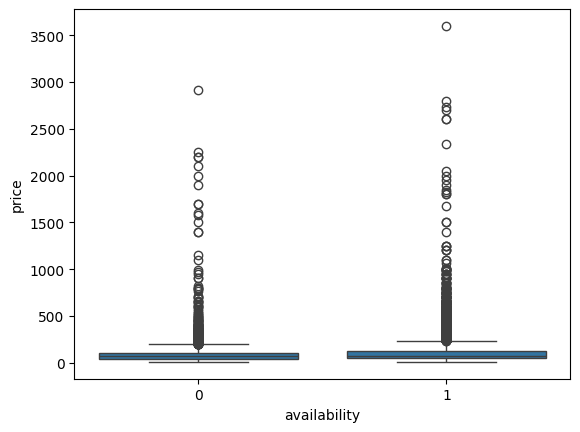

In [39]:
# Lets explore availability with price

sns.boxplot(x=train_data['availability'],y=train_data['price'])

In [40]:
train_data['availability'].unique()

array([0, 1], dtype=int64)

In [41]:
sam=[]
for i in [0,1]:
    s=train_data[train_data['availability']==i]['price']
    sam.append(s)

In [42]:
# H0: All group mean are same
# Ha: At least one group mean is different from the others

stats.f_oneway(sam[0],sam[1])

F_onewayResult(statistic=15.854923871722244, pvalue=6.87516155584131e-05)

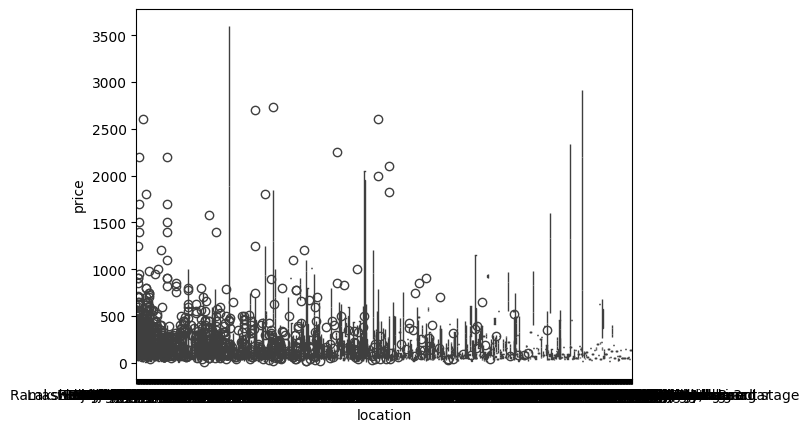

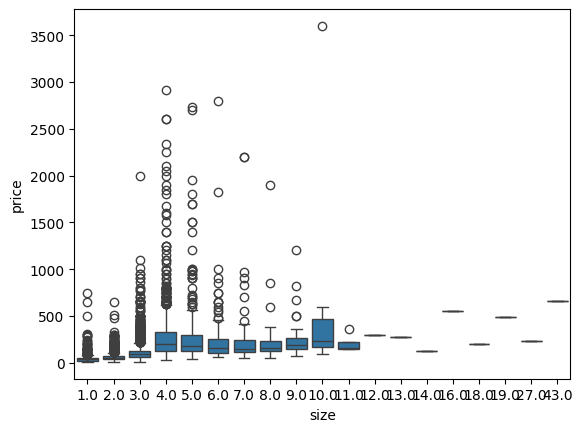

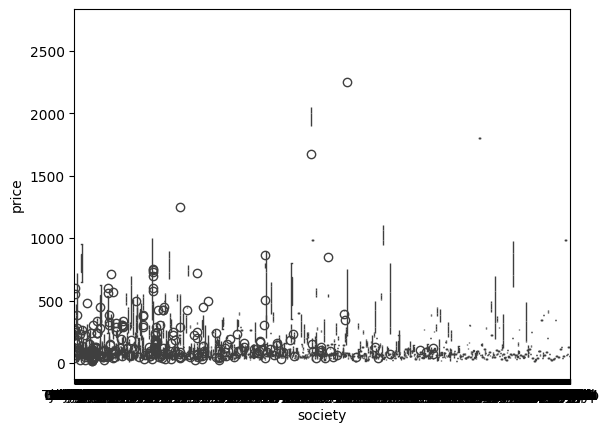

In [43]:
# all cat cols

for i in ['location','size','society']:
    sns.boxplot(x=train_data[i],y=train_data['price'])
    plt.show()

### Data Preprocessing 

In [44]:
data=pd.concat([train_data,test_data],axis=0)

In [45]:
data.shape

(14800, 9)

In [46]:
# Check the missing for values

data.isnull().sum()

area_type          0
availability       0
location           1
size              18
society         6128
total_sqft       247
bath              80
balcony          678
price           1480
dtype: int64

In [47]:
data[data['bath'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,0,Devanahalli,4.0,BrereAt,NaN,NaN,NaN,192.000
81,Built-up Area,0,Hennur Road,4.0,Gollela,NaN,NaN,NaN,224.500
224,Super built-up Area,0,Devanahalli,3.0,Jurdsig,NaN,NaN,NaN,74.820
344,Super built-up Area,0,Kanakpura Road,1.0,PrarePa,525.0,NaN,NaN,21.530
579,Plot Area,0,Sarjapur Road,NaN,Asiss B,NaN,NaN,NaN,34.185
...,...,...,...,...,...,...,...,...,...
817,Super built-up Area,19-Dec,Binny Pete,4 BHK,Shestlo,2695 - 2940,NaN,NaN,NaN
1155,Super built-up Area,18-Nov,Thanisandra,4 BHK,Bhe 2ko,2259,NaN,NaN,NaN
1160,Plot Area,Immediate Possession,Hosa Road,NaN,MSodsGr,600 - 4000,NaN,NaN,NaN
1231,Super built-up Area,19-Dec,Binny Pete,4 BHK,Shestlo,2695 - 2940,NaN,NaN,NaN


In [48]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [49]:
# There is only 1 null value in location so we can drop the rows

data.drop(index=568,inplace=True)

In [50]:
def convert_to_float(s):
    if isinstance(s, str):
        parts = s.split('-')
        if len(parts) == 2:
            try:
                return (float(parts[0].strip()) + float(parts[1].strip())) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return float(s.strip())
            except ValueError:
                return np.nan
    else:
        return np.nan


data['total_sqft'] = data['total_sqft'].apply(convert_to_float)

In [51]:



data['size']=data['size'].fillna(data['size'].mode()[0])
data['society']=data['society'].fillna(data['society'].mode()[0])
data['total_sqft']=data['total_sqft'].fillna(data['total_sqft'].median())
data['bath']=data['bath'].fillna(data['bath'].median())
data['balcony']=data['balcony'].fillna(data['balcony'].median())



In [52]:
# Since we have treated the missing values, lets check
# 1479 missing values for price we are not treating it because we have to predict this column
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1479
dtype: int64

In [53]:
# So we are not treating outliers will try if not get good score

### Feature enginnering

In [54]:
data['area_type'].value_counts()

area_type
Super built-up  Area    9735
Built-up  Area          2687
Plot  Area              2279
Carpet  Area              97
Name: count, dtype: int64

In [55]:
are_d=pd.get_dummies(data['area_type'],drop_first=True,dtype=int)

In [56]:
data = pd.concat([data, are_d], axis=1)

In [57]:
data.drop(columns='area_type',inplace=True)

In [58]:
data.head(5)

,availability,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,0,Electronic City Phase II,2.0,Coomee,1301.0,2.0,1.0,39.07,0,0,1
1,1,Chikka Tirupathi,4.0,Theanmp,1301.0,5.0,3.0,120.00,0,1,0
2,1,Uttarahalli,3.0,GrrvaGr,1301.0,2.0,3.0,62.00,0,0,0
3,1,Lingadheeranahalli,3.0,Soiewre,1301.0,3.0,1.0,95.00,0,0,1
4,1,Kothanur,2.0,GrrvaGr,1301.0,2.0,1.0,51.00,0,0,1


In [59]:
data['location'].value_counts()

location
Whitefield                                  591
Sarjapur  Road                              437
Electronic City                             337
Kanakpura Road                              298
Thanisandra                                 277
                                           ... 
Mullur                                        1
Viswapriyanagar.begur Road.bommanahalli.      1
Venkateshpuram                                1
T K Reddy Layout                              1
Vishweswaraiah Layout 4th Block               1
Name: count, Length: 1357, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le=LabelEncoder()
data['location']=le.fit_transform(pd.DataFrame(data['location']))

In [62]:
data.head(5)

,availability,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,0,430,2.0,Coomee,1301.0,2.0,1.0,39.07,0,0,1
1,1,325,4.0,Theanmp,1301.0,5.0,3.0,120.00,0,1,0
2,1,1218,3.0,GrrvaGr,1301.0,2.0,3.0,62.00,0,0,0
3,1,778,3.0,Soiewre,1301.0,3.0,1.0,95.00,0,0,1
4,1,736,2.0,GrrvaGr,1301.0,2.0,1.0,51.00,0,0,1


In [63]:
data['society'].value_counts()

society
GrrvaGr    6220
PrarePa      78
Prtates      64
Bhmesy       63
Sryalan      63
           ... 
DSapete       1
Matrai        1
SrentAp       1
Saowsou       1
MaicaRS       1
Name: count, Length: 2831, dtype: int64

In [64]:
fre=data['society'].value_counts(normalize=True)

In [65]:
data['society']=data['society'].map(fre)

In [66]:
data.head()

,availability,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,0,430,2.0,0.000338,1301.0,2.0,1.0,39.07,0,0,1
1,1,325,4.0,0.000878,1301.0,5.0,3.0,120.00,0,1,0
2,1,1218,3.0,0.420327,1301.0,2.0,3.0,62.00,0,0,0
3,1,778,3.0,0.001689,1301.0,3.0,1.0,95.00,0,0,1
4,1,736,2.0,0.420327,1301.0,2.0,1.0,51.00,0,0,1


In [67]:
data.dtypes

availability             object
location                  int32
size                     object
society                 float64
total_sqft              float64
bath                    float64
balcony                 float64
price                   float64
Carpet  Area              int32
Plot  Area                int32
Super built-up  Area      int32
dtype: object

In [68]:
data['availability']=[1 if x=='Ready To Move' else 0 for x in data['availability']]
data['availability']=data['availability'].astype(int)

In [69]:
data.dtypes

availability              int32
location                  int32
size                     object
society                 float64
total_sqft              float64
bath                    float64
balcony                 float64
price                   float64
Carpet  Area              int32
Plot  Area                int32
Super built-up  Area      int32
dtype: object

In [70]:
data.head(2)

,availability,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,0,430,2.0,0.000338,1301.0,2.0,1.0,39.07,0,0,1
1,0,325,4.0,0.000878,1301.0,5.0,3.0,120.00,0,1,0


In [71]:
data['size']=data['size'].apply(extract_bhk)

In [72]:
le=LabelEncoder()
data['size']=le.fit_transform(pd.DataFrame(data['size']))

### Outlier treatment 

In [73]:
data.columns

Index(['availability', 'location', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'],
      dtype='object')

In [74]:
data.dtypes

availability              int32
location                  int32
size                      int64
society                 float64
total_sqft              float64
bath                    float64
balcony                 float64
price                   float64
Carpet  Area              int32
Plot  Area                int32
Super built-up  Area      int32
dtype: object

In [75]:
for i in ['bath',
       'balcony', 'price']:
    q3,q1=np.quantile(data[i],[0.75,0.25])
    iqr=q3-q1
    ul=q3+3.5*iqr
    ll=q1-3.5*iqr
    data[i]=np.where(data[i]>ul,ul,data[i])
    data[i]=np.where(data[i]<ll,ll,data[i])

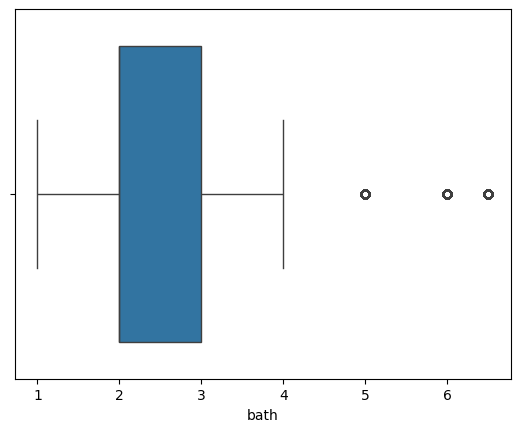

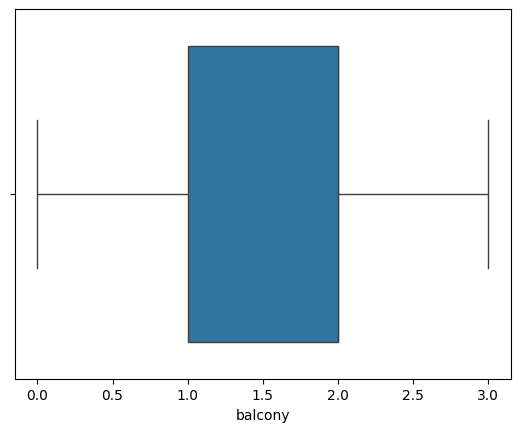

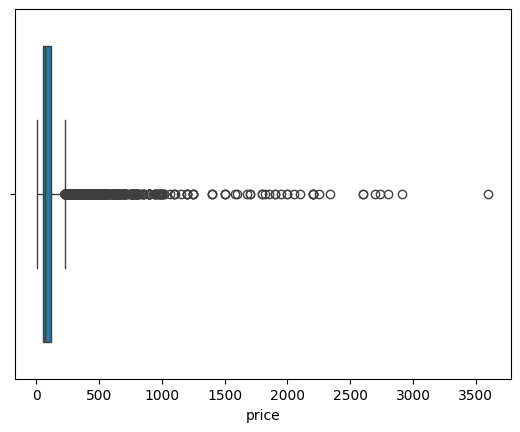

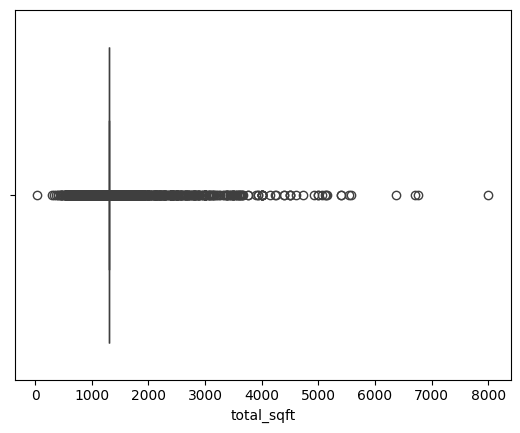

In [76]:
for i in  num_cols:
    sns.boxplot(x=data[i])
    plt.show()

In [77]:
data['total_sqft'].value_counts()

total_sqft
1301.0    13322
1200.0       97
1500.0       33
2400.0       28
1000.0       27
          ...  
695.0         1
2150.0        1
785.0         1
661.0         1
996.0         1
Name: count, Length: 658, dtype: int64

### Train test 

In [78]:
train_set=data[data['price'].notnull()]
test_set=data[data['price'].isnull()]

In [79]:
test_set.drop(columns=['price'],inplace=True)
test_set

,availability,location,size,society,total_sqft,bath,balcony,Carpet Area,Plot Area,Super built-up Area
0,1,284,1,0.000338,1225.0,2.0,2.0,0,0,1
1,1,103,8,0.420327,2400.0,6.5,2.0,0,1,0
2,0,534,3,0.000135,1650.0,5.0,2.0,0,1,0
3,1,721,2,0.000068,1322.0,3.0,1.0,0,0,1
4,1,727,1,0.000068,1161.0,2.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1475,1,1283,1,0.002298,1246.0,2.0,1.0,0,0,1
1476,1,477,2,0.420327,1660.0,3.0,2.0,0,0,1
1477,1,314,1,0.001081,1216.0,2.0,2.0,0,0,1
1478,0,1207,1,0.000946,996.0,2.0,1.0,0,0,0


In [80]:
# Train test split on train_set

from sklearn.model_selection import train_test_split

In [81]:
y=train_set['price']
x=train_set.drop(columns='price')

In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=2)

In [83]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(10655, 10) (2664, 10) (10655,) (2664,)


### Predective Modelling

In [84]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [85]:
def hack_eval(y_true,y_pred):
    scor=1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
    return scor

In [86]:
r2=[]
ms_error=[]
rmse_errr=[]
map_error=[]
fit_model=[]
hack_score=[]

def model_evaluation(model,xtrain,ytrain,xtest,ytest):
    model=model
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    
    print('R2: ', r2_score(ytest,pred))
    print('MSE: ',mean_squared_error(ytest,pred))
    print('RMSE: ',np.sqrt(r2_score(ytest,pred)))
    print('MAPE: ',mean_absolute_percentage_error(ytest,pred))
    print('MAE: ',mean_absolute_error(ytest,pred))
    print('Hack Score: ', hack_eval(ytest,pred))
    
    inp=input('Do you want to save this model?  Y/N')
    if inp.lower()=='y':
        fit_model.append(str(model))
        r2.append(r2_score(ytest,pred))
        ms_error.append(mean_squared_error(ytest,pred))
        rmse_errr.append(np.sqrt(r2_score(ytest,pred)))
        map_error.append(mean_absolute_percentage_error(ytest,pred))
        hack_score.append(hack_eval(ytest,pred))

        global score_card

        score_card=pd.DataFrame({'model':fit_model,
                                'R2':r2,
                                'RMSE':rmse_errr,
                                'MAPE':map_error,
                                'Hack Score':hack_score})
    else:
        return 
          

In [87]:
model_evaluation(LinearRegression(),xtrain,ytrain,xtest,ytest)

R2:  0.23077313579696446
MSE:  18730.56159243479
RMSE:  0.4803885258797971
MAPE:  0.5155113973583058
MAE:  56.162512232070796
Hack Score:  0.7349326001059637
Do you want to save this model?  Y/Ny


In [88]:
model_evaluation(Ridge(alpha=1.0),xtrain,ytrain,xtest,ytest)

R2:  0.23077242255505626
MSE:  18730.578959770897
RMSE:  0.4803877835197896
MAPE:  0.5155325990129459
MAE:  56.163097698708576
Hack Score:  0.7354064366723114
Do you want to save this model?  Y/Ny


In [89]:
model_evaluation(Lasso(alpha=1),xtrain,ytrain,xtest,ytest)

R2:  0.22937163487855106
MSE:  18764.687934734855
RMSE:  0.4789275883456194
MAPE:  0.5242629440169043
MAE:  56.55550846954803
Hack Score:  0.7496874609226649
Do you want to save this model?  Y/Ny


In [90]:
model_evaluation(DecisionTreeRegressor(max_depth=9,max_features=7),xtrain,ytrain,xtest,ytest)

R2:  0.08059406916755107
MSE:  22387.399891121837
RMSE:  0.2838909459062601
MAPE:  0.4737369325306059
MAE:  53.560782804735474
Hack Score:  0.7749138023361936
Do you want to save this model?  Y/Ny


In [91]:
model_evaluation(RandomForestRegressor(n_estimators=90,max_depth=9,max_features=7),xtrain,ytrain,xtest,ytest)

R2:  0.3202675194799778
MSE:  16551.386444296415
RMSE:  0.5659218315986562
MAPE:  0.4325765723704666
MAE:  49.51467037764255
Hack Score:  0.7915166052868946
Do you want to save this model?  Y/Ny


In [92]:
model_evaluation(RandomForestRegressor(n_estimators=90,max_depth=9,max_features=7),xtrain,ytrain,xtest,ytest)

R2:  0.31291668446464915
MSE:  16730.37820136809
RMSE:  0.5593895641363442
MAPE:  0.43222675208029837
MAE:  49.458996835204985
Hack Score:  0.7913819229965715
Do you want to save this model?  Y/Ny


In [93]:
model_evaluation(AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=10)),xtrain,ytrain,xtest,ytest)

R2:  0.35675701827544937
MSE:  15662.872487657924
RMSE:  0.5972914014745645
MAPE:  0.4614421141383051
MAE:  49.58694710536073
Hack Score:  0.7896838546068741
Do you want to save this model?  Y/Ny


In [94]:
model_evaluation(GradientBoostingRegressor(max_depth=7,n_estimators=100),xtrain,ytrain,xtest,ytest)

R2:  0.3828481683784736
MSE:  15027.55680022613
RMSE:  0.6187472572694553
MAPE:  0.38631877401474024
MAE:  44.868752178430036
Hack Score:  0.8088352271416398
Do you want to save this model?  Y/Ny


In [95]:
model_evaluation(XGBRegressor(n_estimator=170,max_depth=10),xtrain,ytrain,xtest,ytest)

R2:  0.21527114787563173
MSE:  19108.032730116047
RMSE:  0.4639732189206956
MAPE:  0.3953192845938547
MAE:  49.3701619591047
Hack Score:  0.7881153285365406
Do you want to save this model?  Y/Ny


In [96]:
base_models=[('DT',DecisionTreeRegressor(max_depth=10,max_features=9)),
            ('RF',RandomForestRegressor(n_estimators=100,max_depth=9)),
            ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=130)),
            ('XGB',XGBRegressor(max_depth=8,n_estimators=130))]

In [97]:
model_evaluation(VotingRegressor(base_models),xtrain,ytrain,xtest,ytest)

R2:  0.3290170665479685
MSE:  16338.33625339766
RMSE:  0.573600092876534
MAPE:  0.3827104367848047
MAE:  45.6756065182956
Hack Score:  0.8079474221857849
Do you want to save this model?  Y/Ny


In [98]:
model_evaluation(StackingRegressor(estimators=base_models),xtrain,ytrain,xtest,ytest)

R2:  0.37753095676358916
MSE:  15157.030125050513
RMSE:  0.6144354781127056
MAPE:  0.4162333225536839
MAE:  45.72144603629701
Hack Score:  0.8025885575184879
Do you want to save this model?  Y/Ny


In [99]:
model_evaluation(StackingRegressor(estimators=base_models,final_estimator=DecisionTreeRegressor(max_depth=5)),xtrain,ytrain,xtest,ytest)

R2:  0.39260046827113393
MSE:  14790.089724766378
RMSE:  0.626578381586162
MAPE:  0.38943489615792565
MAE:  45.21526171222845
Hack Score:  0.8068427228514456
Do you want to save this model?  Y/Ny


In [100]:
score_card

,model,R2,RMSE,MAPE,Hack Score
0,LinearRegression(),0.230773,0.480389,0.515511,0.734933
1,Ridge(),0.230772,0.480388,0.515533,0.735406
2,Lasso(alpha=1),0.229372,0.478928,0.524263,0.749687
3,"DecisionTreeRegressor(max_depth=9, max_feature...",0.080594,0.283891,0.473737,0.774914
4,"RandomForestRegressor(max_depth=9, max_feature...",0.320268,0.565922,0.432577,0.791517
5,"RandomForestRegressor(max_depth=9, max_feature...",0.312917,0.559390,0.432227,0.791382
6,AdaBoostRegressor(estimator=RandomForestRegres...,0.356757,0.597291,0.461442,0.789684
7,GradientBoostingRegressor(max_depth=7),0.382848,0.618747,0.386319,0.808835
8,"XGBRegressor(base_score=None, booster=None, ca...",0.215271,0.463973,0.395319,0.788115
9,"VotingRegressor(estimators=[('DT',\n ...",0.329017,0.573600,0.382710,0.807947


### Gradient Boosting is giving best score

In [101]:
param_grid = {'n_estimators': [80,100,150],
    'learning_rate': [0.05,1,1.0,1.5],
    'max_depth': [7,8,9,10],
    'max_features': [10,11,12]}

In [102]:
gscv=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid,scoring='r2',cv=5,verbose=3)

In [103]:
gscv.fit(xtrain,ytrain)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=80;, score=0.436 total time=   0.5s
[CV 2/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=80;, score=0.313 total time=   0.5s
[CV 3/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=80;, score=0.409 total time=   0.5s
[CV 4/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=80;, score=0.349 total time=   0.5s
[CV 5/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=80;, score=0.317 total time=   0.5s
[CV 1/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=100;, score=0.433 total time=   0.6s
[CV 2/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=100;, score=0.301 total time=   0.6s
[CV 3/5] END learning_rate=0.05, max_depth=7, max_features=10, n_estimators=100;, score=0.442 total time=   0.6s
[CV 4/5] END learning_rate=0.05, max_d

[CV 4/5] END learning_rate=0.05, max_depth=8, max_features=11, n_estimators=150;, score=0.365 total time=   1.1s
[CV 5/5] END learning_rate=0.05, max_depth=8, max_features=11, n_estimators=150;, score=0.317 total time=   1.1s
[CV 1/5] END learning_rate=0.05, max_depth=8, max_features=12, n_estimators=80;, score=0.418 total time=   0.6s
[CV 2/5] END learning_rate=0.05, max_depth=8, max_features=12, n_estimators=80;, score=0.347 total time=   0.6s
[CV 3/5] END learning_rate=0.05, max_depth=8, max_features=12, n_estimators=80;, score=0.442 total time=   0.6s
[CV 4/5] END learning_rate=0.05, max_depth=8, max_features=12, n_estimators=80;, score=0.359 total time=   0.6s
[CV 5/5] END learning_rate=0.05, max_depth=8, max_features=12, n_estimators=80;, score=0.321 total time=   0.6s
[CV 1/5] END learning_rate=0.05, max_depth=8, max_features=12, n_estimators=100;, score=0.412 total time=   0.7s
[CV 2/5] END learning_rate=0.05, max_depth=8, max_features=12, n_estimators=100;, score=0.348 total t

[CV 2/5] END learning_rate=0.05, max_depth=10, max_features=10, n_estimators=150;, score=0.105 total time=   1.4s
[CV 3/5] END learning_rate=0.05, max_depth=10, max_features=10, n_estimators=150;, score=0.467 total time=   1.4s
[CV 4/5] END learning_rate=0.05, max_depth=10, max_features=10, n_estimators=150;, score=0.292 total time=   1.4s
[CV 5/5] END learning_rate=0.05, max_depth=10, max_features=10, n_estimators=150;, score=0.251 total time=   1.4s
[CV 1/5] END learning_rate=0.05, max_depth=10, max_features=11, n_estimators=80;, score=0.447 total time=   0.7s
[CV 2/5] END learning_rate=0.05, max_depth=10, max_features=11, n_estimators=80;, score=0.107 total time=   0.7s
[CV 3/5] END learning_rate=0.05, max_depth=10, max_features=11, n_estimators=80;, score=0.445 total time=   0.7s
[CV 4/5] END learning_rate=0.05, max_depth=10, max_features=11, n_estimators=80;, score=0.291 total time=   0.7s
[CV 5/5] END learning_rate=0.05, max_depth=10, max_features=11, n_estimators=80;, score=0.26

[CV 1/5] END learning_rate=1, max_depth=7, max_features=12, n_estimators=150;, score=0.008 total time=   1.0s
[CV 2/5] END learning_rate=1, max_depth=7, max_features=12, n_estimators=150;, score=-0.437 total time=   1.0s
[CV 3/5] END learning_rate=1, max_depth=7, max_features=12, n_estimators=150;, score=0.195 total time=   1.0s
[CV 4/5] END learning_rate=1, max_depth=7, max_features=12, n_estimators=150;, score=-0.232 total time=   1.0s
[CV 5/5] END learning_rate=1, max_depth=7, max_features=12, n_estimators=150;, score=-0.288 total time=   1.0s
[CV 1/5] END learning_rate=1, max_depth=8, max_features=10, n_estimators=80;, score=0.233 total time=   0.6s
[CV 2/5] END learning_rate=1, max_depth=8, max_features=10, n_estimators=80;, score=0.004 total time=   0.6s
[CV 3/5] END learning_rate=1, max_depth=8, max_features=10, n_estimators=80;, score=0.202 total time=   0.6s
[CV 4/5] END learning_rate=1, max_depth=8, max_features=10, n_estimators=80;, score=0.070 total time=   0.6s
[CV 5/5] EN

[CV 1/5] END learning_rate=1, max_depth=9, max_features=11, n_estimators=150;, score=0.226 total time=   1.3s
[CV 2/5] END learning_rate=1, max_depth=9, max_features=11, n_estimators=150;, score=-0.114 total time=   1.3s
[CV 3/5] END learning_rate=1, max_depth=9, max_features=11, n_estimators=150;, score=0.315 total time=   1.3s
[CV 4/5] END learning_rate=1, max_depth=9, max_features=11, n_estimators=150;, score=0.054 total time=   1.3s
[CV 5/5] END learning_rate=1, max_depth=9, max_features=11, n_estimators=150;, score=-0.269 total time=   1.3s
[CV 1/5] END learning_rate=1, max_depth=9, max_features=12, n_estimators=80;, score=0.205 total time=   0.6s
[CV 2/5] END learning_rate=1, max_depth=9, max_features=12, n_estimators=80;, score=-0.113 total time=   0.6s
[CV 3/5] END learning_rate=1, max_depth=9, max_features=12, n_estimators=80;, score=0.349 total time=   0.6s
[CV 4/5] END learning_rate=1, max_depth=9, max_features=12, n_estimators=80;, score=-0.271 total time=   0.6s
[CV 5/5] E

[CV 5/5] END learning_rate=1.0, max_depth=7, max_features=10, n_estimators=100;, score=-0.219 total time=   0.6s
[CV 1/5] END learning_rate=1.0, max_depth=7, max_features=10, n_estimators=150;, score=0.047 total time=   1.0s
[CV 2/5] END learning_rate=1.0, max_depth=7, max_features=10, n_estimators=150;, score=-0.455 total time=   1.0s
[CV 3/5] END learning_rate=1.0, max_depth=7, max_features=10, n_estimators=150;, score=0.190 total time=   1.0s
[CV 4/5] END learning_rate=1.0, max_depth=7, max_features=10, n_estimators=150;, score=-0.270 total time=   1.0s
[CV 5/5] END learning_rate=1.0, max_depth=7, max_features=10, n_estimators=150;, score=-0.205 total time=   1.0s
[CV 1/5] END learning_rate=1.0, max_depth=7, max_features=11, n_estimators=80;, score=-0.076 total time=   0.5s
[CV 2/5] END learning_rate=1.0, max_depth=7, max_features=11, n_estimators=80;, score=-0.447 total time=   0.5s
[CV 3/5] END learning_rate=1.0, max_depth=7, max_features=11, n_estimators=80;, score=0.100 total ti

[CV 4/5] END learning_rate=1.0, max_depth=8, max_features=12, n_estimators=100;, score=-0.203 total time=   0.7s
[CV 5/5] END learning_rate=1.0, max_depth=8, max_features=12, n_estimators=100;, score=-0.528 total time=   0.7s
[CV 1/5] END learning_rate=1.0, max_depth=8, max_features=12, n_estimators=150;, score=0.234 total time=   1.1s
[CV 2/5] END learning_rate=1.0, max_depth=8, max_features=12, n_estimators=150;, score=0.002 total time=   1.1s
[CV 3/5] END learning_rate=1.0, max_depth=8, max_features=12, n_estimators=150;, score=0.197 total time=   1.1s
[CV 4/5] END learning_rate=1.0, max_depth=8, max_features=12, n_estimators=150;, score=-0.111 total time=   1.1s
[CV 5/5] END learning_rate=1.0, max_depth=8, max_features=12, n_estimators=150;, score=-0.454 total time=   1.1s
[CV 1/5] END learning_rate=1.0, max_depth=9, max_features=10, n_estimators=80;, score=0.245 total time=   0.6s
[CV 2/5] END learning_rate=1.0, max_depth=9, max_features=10, n_estimators=80;, score=-0.143 total ti

[CV 2/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=100;, score=-0.067 total time=   0.9s
[CV 3/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=100;, score=0.292 total time=   0.9s
[CV 4/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=100;, score=-0.121 total time=   0.9s
[CV 5/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=100;, score=-0.010 total time=   0.9s
[CV 1/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=150;, score=0.202 total time=   1.6s
[CV 2/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=150;, score=-0.069 total time=   1.5s
[CV 3/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=150;, score=0.239 total time=   1.4s
[CV 4/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=150;, score=0.097 total time=   1.4s
[CV 5/5] END learning_rate=1.0, max_depth=10, max_features=11, n_estimators=150;, score=0.02

[CV 5/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=80;, score=-0.510 total time=   0.6s
[CV 1/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=100;, score=-0.331 total time=   0.8s
[CV 2/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=100;, score=-0.803 total time=   0.8s
[CV 3/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=100;, score=-0.220 total time=   0.9s
[CV 4/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=100;, score=-0.226 total time=   0.8s
[CV 5/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=100;, score=-0.473 total time=   0.7s
[CV 1/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=150;, score=-0.208 total time=   1.2s
[CV 2/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=150;, score=-0.833 total time=   1.2s
[CV 3/5] END learning_rate=1.5, max_depth=8, max_features=10, n_estimators=150;, score=-0.172 tot

[CV 3/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=80;, score=-0.158 total time=   0.6s
[CV 4/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=80;, score=-0.690 total time=   0.6s
[CV 5/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=80;, score=-0.582 total time=   0.6s
[CV 1/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=100;, score=-0.250 total time=   0.8s
[CV 2/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=100;, score=-0.505 total time=   0.8s
[CV 3/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=100;, score=-0.125 total time=   0.8s
[CV 4/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=100;, score=-0.562 total time=   0.8s
[CV 5/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=100;, score=-0.853 total time=   0.8s
[CV 1/5] END learning_rate=1.5, max_depth=9, max_features=12, n_estimators=150;, score=-0.251 total

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 1, 1.0, 1.5],
                         'max_depth': [7, 8, 9, 10],
                         'max_features': [10, 11, 12],
                         'n_estimators': [80, 100, 150]},
             scoring='r2', verbose=3)

In [104]:
gscv.best_score_

0.39963639899457093

In [105]:
gscv.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'max_features': 12,
 'n_estimators': 150}

In [106]:
model_evaluation(GradientBoostingRegressor(**gscv.best_params_),xtrain,ytrain,xtest,ytest)

R2:  0.35940034474821325
MSE:  15598.507874809524
RMSE:  0.5995000790226914
MAPE:  0.38618979965096734
MAE:  45.28810539808375
Hack Score:  0.8079424764816869
Do you want to save this model?  Y/Ny


In [107]:
score_card

,model,R2,RMSE,MAPE,Hack Score
0,LinearRegression(),0.230773,0.480389,0.515511,0.734933
1,Ridge(),0.230772,0.480388,0.515533,0.735406
2,Lasso(alpha=1),0.229372,0.478928,0.524263,0.749687
3,"DecisionTreeRegressor(max_depth=9, max_feature...",0.080594,0.283891,0.473737,0.774914
4,"RandomForestRegressor(max_depth=9, max_feature...",0.320268,0.565922,0.432577,0.791517
5,"RandomForestRegressor(max_depth=9, max_feature...",0.312917,0.559390,0.432227,0.791382
6,AdaBoostRegressor(estimator=RandomForestRegres...,0.356757,0.597291,0.461442,0.789684
7,GradientBoostingRegressor(max_depth=7),0.382848,0.618747,0.386319,0.808835
8,"XGBRegressor(base_score=None, booster=None, ca...",0.215271,0.463973,0.395319,0.788115
9,"VotingRegressor(estimators=[('DT',\n ...",0.329017,0.573600,0.382710,0.807947


In [108]:
model_evaluation(GradientBoostingRegressor(n_estimators=200,max_depth=7,max_features=10,min_samples_split=4,learning_rate=0.1),xtrain,ytrain,xtest,ytest)

R2:  0.3076671326034275
MSE:  16858.204021090554
RMSE:  0.5546775032425846
MAPE:  0.3665004024200387
MAE:  43.89989831125082
Hack Score:  0.8129309383507246
Do you want to save this model?  Y/Ny


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [125]:
y=train_set['price']
x=train_set.drop(columns='price')

In [130]:
r2=[]
ms_error=[]
rmse_errr=[]
map_error=[]
fit_model=[]
hack_score=[]

def model_evaluation(model,xtrain,ytrain,xtest,ytest):
    model=model
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    
    print('R2: ', r2_score(ytest,pred))
    print('MSE: ',mean_squared_error(ytest,pred))
    print('RMSE: ',np.sqrt(r2_score(ytest,pred)))
    print('MAPE: ',mean_absolute_percentage_error(ytest,pred))
    print('MAE: ',mean_absolute_error(ytest,pred))
    print('Hack Score: ', hack_eval(ytest,pred))
    
    inp=input('Do you want to save this model?  Y/N')
    if inp.lower()=='y':
        fit_model.append(str(model))
        r2.append(r2_score(ytest,pred))
        ms_error.append(mean_squared_error(ytest,pred))
        rmse_errr.append(np.sqrt(r2_score(ytest,pred)))
        map_error.append(mean_absolute_percentage_error(ytest,pred))
        hack_score.append(hack_eval(ytest,pred))

        global score_card

        score_card=pd.DataFrame({'model':fit_model,
                                'R2':r2,
                                'RMSE':rmse_errr,
                                'MAPE':map_error,
                                'Hack Score':hack_score})
    else:
        return 
          